VITÓRIA MARIA NAZARETH DE ALMEIDA
<P>DRE: 121076766</P>

<h1> MONOPOLY & ALGEBRA LINEAR</h1>
<p>Esse projeto tem como objetivo utilizar das ferramentas de Álgebra Linear para entender um pouco mais sobre a dinâmica do jogo Monopoly e extrair alguns insights valiosos a serem utilizados na hora do jogo</p>


<h2>SOBRE O JOGO</h2>
<p>Monopoly é um jogo de tabuleiro famoso mundialmente em que propriedades, bairros e até mesmo pontos turísticos podem ser comprados. Cada uma dessas aquisições é representada por uma casa no tabuleiro, de modo que se um jogador parar em uma propriedade e ela não possuir dono, o jodaor pode comprá-la. Entretanto, se a propriedade já possuir um dono, o jogador deve pagar pela sua estadia ao proprietário.</p>
<p>Dessa forma, jogadores vão ganhando dinheiro enquanto outros entram em falência. Originalmente o jogo acaba quando todas as propriedades forem compradas, e o jogador com mais dinheiro sai como vencedor. Mesmo assim, variações no jogo são possíveis, como por exemplo, jogar até que um único jogador detenha o monopólio das propriedades e todos os outros entram em falência.</p>
<p>O tabuleiro do Monopoly é composto por 40 casas, podendo cada uma dela ser de:
<ul>
<li>Propriedade</li>
<li>Sorte/Cofre</li>
<li>Punição</li>
<li>Prisão</li>
</ul>
<p>Como é possível observar na imagem abaixo:</p>

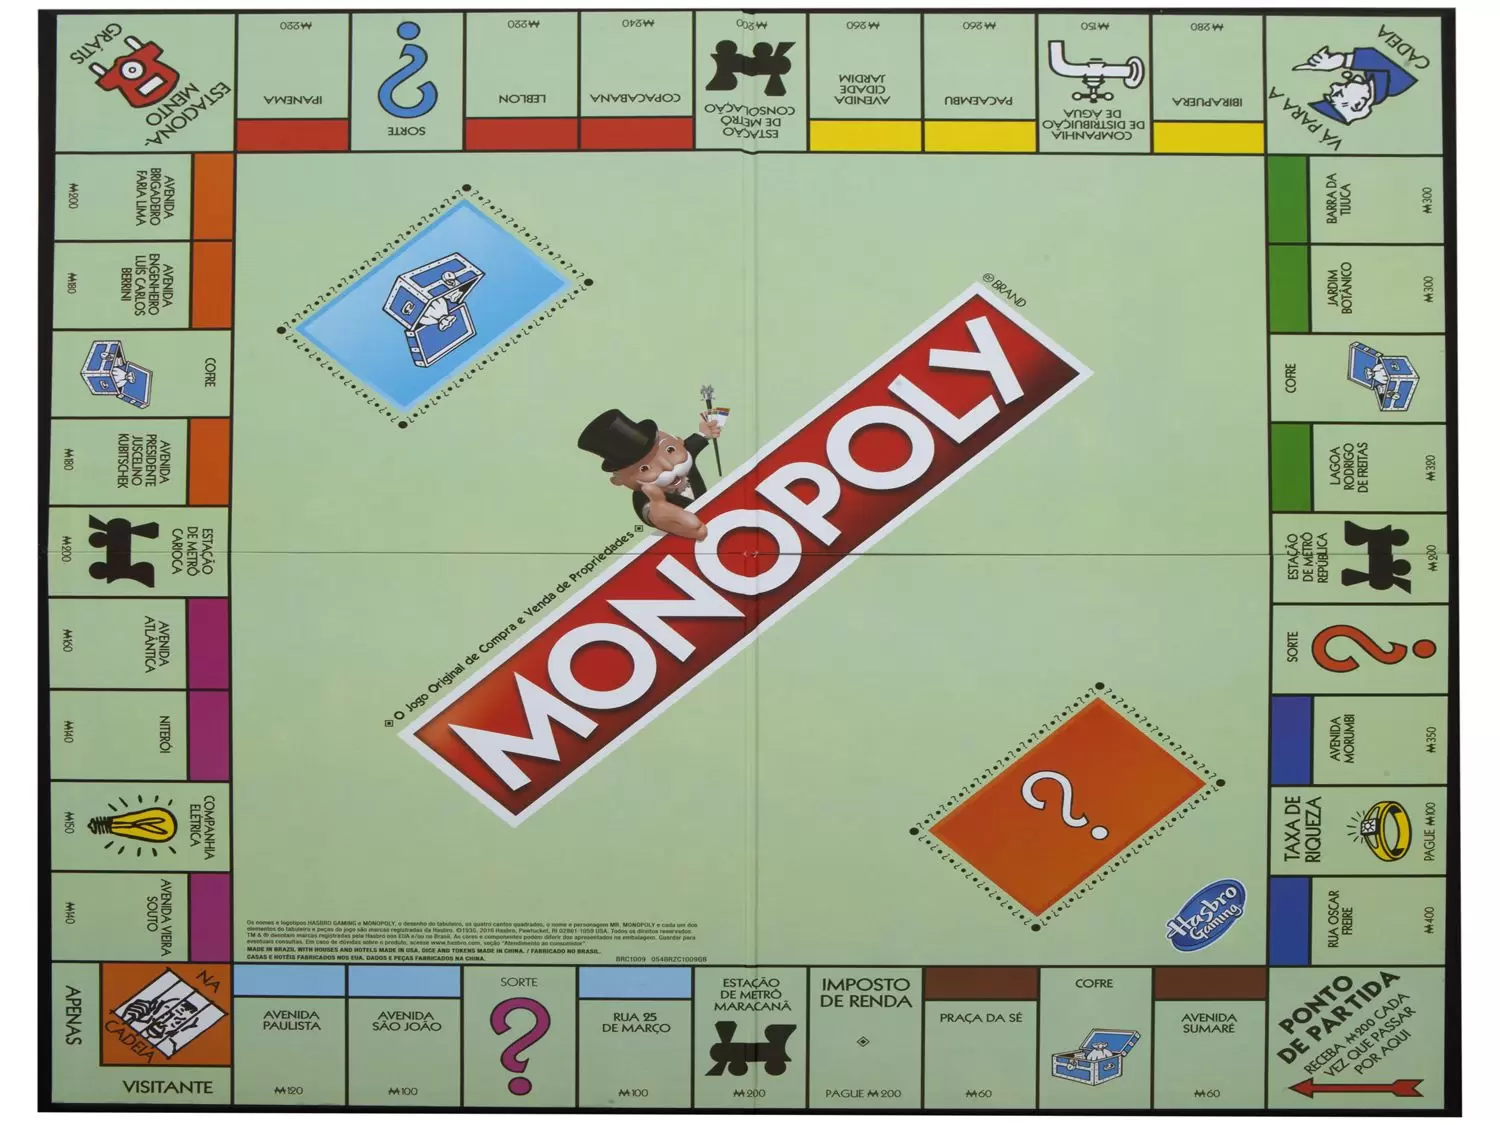

<p>Outra regra do jogo importante de ressaltar é que os jogadores se movimentam rodando 2 dados de 6 lados. Entretanto, não é permitido avançar rolando 2 dados iguais (6 e 6 ou 2 e 2, por exemplo), de modo que se o jogador rodar 2 dados com valores iguais, ele deve rodar os dados novamente para determinar a quantidade de casas avançadas. Se tivermos por exemplo, uma situação em que um jogador roda os dados e obtém os valores 6 e 6, ele não avança e roda os dados novamente. Suponhamos que na nova rolagem ele obtenha 4 e 5 nos dados, então o número de casas que o jogador avança é 9.</p>
<p>Entretanto, mesmo na re-rolagem o jogador continuar obtendo dados com valores iguais, ele pode ser punido. A regra do jogo diz que se forem obtidos dados com valores iguais em 3 rolagens consecutivas, o jogador vai preso e o turno passa para o próximo jogador.</p>
<p>Quando preso, o jogador não avança nenhuma casa e fica parado na posição de numero 10 por no máximo 3 turnos até que rode dados com valores iguais. Caso o jogador não consiga rodar dados iguais nesses 3 turnos preso, no terceiro turno preso ele é liberado.</p>

<h2>O QUE QUEREMOS DESCOBRIR?</h2>
<p>Algumas perguntas que vão nortear o projeto são:</p>
<ul>
<li>Quais propriedades são mais visitadas no jogo?
<li>Qual a casa mais visitada?
</ul>

<h2>A MODELAGEM</h2>
<p>Temos 40 casas no tabuleiro, porém, para a modelagem da matriz, vamos considerar 123 casas. Considerando que jogando dados iguais o jogador pode ser punido, para essa modelagem vamos criar "casas imaginárias" que guardarão a quantidade de vezes que o jogador rolou valores iguais. Exemplo:</p>
<ul>
<li>Jogador está na casa 2 e rola valores iguais nos dados. No jogo ele iria repetir a jogada, mas na modelagem ele será "movido" para a casa 2.1 que não existe no tabuleiro.</li>
<li>Jogador está na casa 2.1 e novamente tira valores iguais nos dados sendo "movido" para a casa 2.2</li>
<li>Por fim, se ele retirar valores iguais novamente, ele não precisará ser movido para a casa 2.3, pois nesse caso ele estaria na cadeira.</li>
</ul>
<p>Levando as casas imaginárias em conta, temos um total de 120 casas totais na modelagem. As 3 casas restantes são relacionadas a regra da prisão do jogo em que o jogador irá sair da cadeia após 3 rodadas passadas</p>
<h4>Nessa modelagem, considere o jogador saindo da casa 0</h4>

In [ ]:
import numpy as np
import random

In [ ]:
#Matriz de transição de estados (mudança de casas) com as casas do jogo (as físicas e as imaginárias)
transicoes = np.zeros((123, 123))
t1= np.zeros(40) #casas iniciais (0 até 39)
t1[3] = 2/36
t1[4] = 2/36
t1[5] = 4/36
t1[6] = 4/36
t1[7] = 6/36
t1[8] = 4/36
t1[9] = 4/36
t1[10] = 2/36
t1[11] = 2/36
t1_aux = np.copy(t1)
t2 = np.zeros(40) #casas imaginárias x.1 (40 até 79)
t2[0] = 6/36
t3 = np.zeros(40) #casas imaginárias x.2 (80 até 119)
t4 = np.zeros(3) #casas para quando o jogador está preso

#loop para guardar as transições entre as casas físicas
transicao = np.concatenate((t1_aux, t2, t3, t4))
transicoes[0] = transicao
for x in range (1, 40):
  t1_aux = np.roll(t1_aux, 1)
  t2 = np.roll(t2, 1)
  transicao = np.concatenate((t1_aux,t2,t3,t4))
#trecho da casa que leva diretamente para a prisão
  if x == 30:
    linha = np.zeros(123)
    linha[10] = 1
    transicoes[x] = linha
  else:
    transicoes[x] = transicao

In [ ]:
#Fazendo as transições da linha 40 até 79 (quando jogador entra no 1º set de casas imaginárias)
for x in range(40, 80):
  t = np.copy(transicoes[x-40])
  t[x] = 0
  t[x+40] = 6/36
  transicoes[x] = t

#Fazendo as transições da linha 80 até 119 (quando jogador entra no 2º set de casas imaginárias)
for x in range(80, 120):
  t = np.copy(transicoes[x-40])
  t[x] = 0
  t[120] = 6/36
  transicoes[x] = t

<h3>Prisão</h3>
<p>Há duas situações para o jogador: ou ele está visitando a prisão ou ele está preso. No primeiro caso, o jogador está livre e apenas caiu da casa da prisão e, portanto, ele estária na casa física 10 do tabuleiro. No segundo caso o jogador foi preso e foi movido para a prisão. Como ele pode ficar até 3 turnos detido, nessa situação ele estaria nas casas 120 (1º turno na prisão), 121 (2º turno na prisão) ou 122 (3º turno na prisão)</p>

In [ ]:
#1º turno preso
transicoes[120, 10] = 6/36
transicoes[120, 121] = 30/36

#2º turno preso
aux = np.zeros(123)
transicoes[121, 10] = 6/36
transicoes[121, 122] = 30/36

#3º turno preso
transicoes[122, 10] = 1

<p>Abaixo temos o vetor que representa as probabilidades de casas do jogador. Na casa 0, onde ele começa, atribuimos o valor 1 (100% de probabilidade, afinal, o jogador já está lá).</p>
<p>Na linha abaixo, aplicamos a matriz de transição na matriz das possibilidades do jogador para calcular qual a probabilidade de parar em uma casa especifica no jogo. Aqui, podemos assumir a matriz de transição como sendo uma matriz de transformação linear que podemos aplicar quantas vezes quisermos, representando os turnos passados no jogo, de forma a checar as probabilidades de cada casa.</p>
<p>A matriz exibida é um exemplo onde apenas um turno se passou (matriz de transição foi aplicada 1x). Ao jogar o dado, ele tem 0% de chance de permanecer a cada 0 (afinal ou ele sai da casa ou ele vai para um das casas imaginárias), 0% de chance de cair na casa 1 (não da para tirar 1 nos dados) e 0% para a casa 2 (para cair na casa 2, ele precisa de 1 e 1 nos dados o que o moveria para o primeiro set de casas imaginárias). Então, a partir da casa 3 começam as possibilidades.</p>


In [ ]:
pbs = np.zeros(123)
pbs[0] = 1

for i in range(10):
  pbs = pbs @ transicoes

pbs

array([0.01037614, 0.01001938, 0.01063612, 0.01074381, 0.0109848 ,
       0.01166017, 0.0124553 , 0.01355058, 0.01471598, 0.01606761,
       0.03496375, 0.01884193, 0.02027291, 0.02262456, 0.02400078,
       0.02619714, 0.02745667, 0.02944871, 0.02958098, 0.03041708,
       0.03039902, 0.03089511, 0.03044777, 0.03037987, 0.03024353,
       0.02941992, 0.02856211, 0.02726977, 0.02601604, 0.02451188,
       0.02310582, 0.02164087, 0.02017653, 0.01783862, 0.01640234,
       0.01421717, 0.01293078, 0.01099977, 0.01090231, 0.01017414,
       0.00195315, 0.00211394, 0.00238213, 0.00260236, 0.00281431,
       0.00310068, 0.00336749, 0.00366649, 0.00393062, 0.00419565,
       0.00656626, 0.00459873, 0.00474703, 0.00508462, 0.00515072,
       0.00539163, 0.00538707, 0.00555086, 0.00526141, 0.00515225,
       0.00485931, 0.00471466, 0.00437923, 0.00416782, 0.00398985,
       0.00367549, 0.00340785, 0.00307167, 0.00280426, 0.00251663,
       0.        , 0.00213079, 0.00199684, 0.00177626, 0.00170

In [ ]:
turnos = int(input("Insira o número de turnos: "))
pbs = np.zeros(123)
pbs[0] = 1

for i in range (turnos):
  pbs = pbs @ transicoes

pbs


Insira o número de turnos: 5


array([1.77670240e-02, 1.34506935e-02, 1.18397433e-02, 8.51464462e-03,
       5.78756626e-03, 3.75112195e-03, 2.29047063e-03, 1.35269014e-03,
       8.14471879e-04, 5.94844959e-04, 4.30415841e-02, 8.36169961e-04,
       1.25690105e-03, 2.11741520e-03, 3.03032227e-03, 4.47827228e-03,
       6.04847246e-03, 8.29025470e-03, 1.03674491e-02, 1.30971735e-02,
       1.57919694e-02, 1.90874316e-02, 2.22172475e-02, 2.58535284e-02,
       2.94935139e-02, 3.32319345e-02, 3.67750724e-02, 4.00816483e-02,
       4.29198632e-02, 4.51055479e-02, 4.65556148e-02, 4.71181773e-02,
       4.68556834e-02, 4.33517079e-02, 4.13925299e-02, 3.63188835e-02,
       3.29202230e-02, 2.66325425e-02, 2.45876306e-02, 2.00252121e-02,
       1.04785856e-04, 2.69902962e-05, 2.22273027e-05, 6.35065793e-06,
       1.58766448e-06, 0.00000000e+00, 4.28669410e-05, 8.57338820e-05,
       2.14334705e-04, 3.57224508e-04, 1.31458619e-03, 9.00205761e-04,
       1.30188488e-03, 1.67816136e-03, 2.20844129e-03, 2.70061728e-03,
      

<p>O trecho de código abaixo reorganiza a matriz de forma a ficar visualmente mais interpretável uma vez que retorna para a notação de apenas 40 casas e não 123. Para isso, houve a soma das probabilidades da casa física e suas respectivas casas imaginárias.</p>
<p>Exemplo: prob casa 0 + prob casas 0.1 + prob casa 0.2</p>
<p>Também há a distinção da casa da prisão para quando há uma visita ou quando o jogador está de fato preso. Portanto, quando o jogador visita, ele está na casa 10, mas quando está preso ele está na casa 41.</p>

In [ ]:
fmp = np.zeros(41)
for x in range(123):
  if x >=120:
    fmp[40] += pbs[x]
  else:
    fmp[x%40] += pbs[x]

fmp

array([0.01787181, 0.01347768, 0.01186197, 0.00856386, 0.00583202,
       0.00383686, 0.00244765, 0.00162418, 0.00125743, 0.00127119,
       0.04481342, 0.00233651, 0.00333515, 0.00472436, 0.00638188,
       0.00843156, 0.01081305, 0.01385026, 0.01683559, 0.02043218,
       0.02395733, 0.02800693, 0.03163369, 0.03562719, 0.03933703,
       0.04303735, 0.04627248, 0.04918849, 0.05143768, 0.05291686,
       0.04655561, 0.05309415, 0.05180285, 0.0472272 , 0.04430589,
       0.03834792, 0.03426656, 0.02741844, 0.0250417 , 0.02023796,
       0.01028807])

<h1>TURNOS INFINITOS?!</h1>
<p>Podemos descobrir qual a tendencia de visitas conforme os turnos aumentam. E se o jogo durasse muitos turnos? E se o jogo durasse por um número alto de turnos, tendendo ao infinito, qual seria a casa mais visitada pelo jogador? Nesse 1º caso, vamos considerar o estilo de jogo em que termina quando um jogador adquirir monopólio das propriedades do tabuleiro.</p>

In [ ]:
pbs = np.zeros(123)
pbs[0] = 1

for i in range (1000000):
  pbs = pbs @ transicoes

fmp = np.zeros(41)
for x in range(123):
  if x >=120:
    fmp[40] += pbs[x]
  else:
    fmp[x%40] += pbs[x]

maior = fmp[0]
indice = 0
for x in range(1, 41):
  if fmp[x] > maior:
    maior = fmp[x]
    indice = x


print("A casa mais visitada foi a de numero", indice)
fmp

A casa mais visitada foi a de numero 10


array([0.02247498, 0.02197119, 0.02291857, 0.02251887, 0.02194639,
       0.02194327, 0.02177997, 0.02196967, 0.02195579, 0.02213643,
       0.0524706 , 0.02206618, 0.02198054, 0.02395622, 0.02392485,
       0.02591394, 0.02607829, 0.02822342, 0.02661291, 0.02699854,
       0.0257833 , 0.02634451, 0.02520049, 0.02563435, 0.02627025,
       0.02623727, 0.02639397, 0.02613638, 0.02611923, 0.02587359,
       0.02168446, 0.02588801, 0.02595392, 0.02424832, 0.02425053,
       0.02252955, 0.0223455 , 0.02048464, 0.02182193, 0.02146704,
       0.00949213])

<h1>MÉDIA DE TURNOS</h1>
<p>Nesse caso, vamos descobrir qual a tendencia dos jogadores em uma quantidade média de turnos do jogo. Nesse segundo caso, vamos considerar o estilo de jogo em que termina quando todas as propriedades são adquiridas.</p>
<p>Uma partidade de monópoly dura em média 2 horas. Se considerar que um turno leva em média 1 minuto, temos 120 turnos como uma média de uma partida normal nesse estilo de jogo.</p>

In [ ]:
pbs = np.zeros(123)
pbs[0] = 1

for i in range (120):
  pbs = pbs @ transicoes

fmp = np.zeros(41)
for x in range(123):
  if x >=120:
    fmp[40] += pbs[x]
  else:
    fmp[x%40] += pbs[x]

maior = fmp[0]
indice = 0
for x in range(1, 41):
  if fmp[x] > maior:
    maior = fmp[x]
    indice = x


print("A casa mais visitada foi a de numero", indice)
fmp

A casa mais visitada foi a de numero 10


array([0.02247498, 0.02197119, 0.02291857, 0.02251887, 0.02194639,
       0.02194327, 0.02177997, 0.02196967, 0.02195579, 0.02213643,
       0.0524706 , 0.02206618, 0.02198054, 0.02395622, 0.02392485,
       0.02591394, 0.02607829, 0.02822342, 0.02661291, 0.02699854,
       0.0257833 , 0.02634451, 0.02520049, 0.02563435, 0.02627025,
       0.02623727, 0.02639397, 0.02613638, 0.02611923, 0.02587359,
       0.02168446, 0.02588801, 0.02595392, 0.02424832, 0.02425053,
       0.02252955, 0.0223455 , 0.02048464, 0.02182193, 0.02146704,
       0.00949213])

<h1>CONCLUSÃO</h1>
<p>Em ambos os estilos de jogo, vemos que a probabilidade da casa 10 (prisão) é a mais alta. Podemos confirmar isso pelo fato de que a casa da prisão é a única casa de monópoly que pode ser alcançada pelo jogador de 2 formas: ou como visita (como o restante das outras casas) ou quando ele comete alguma transgressão no jogo o que torna a probabilidade dela mais alta do que as outras.</p>
<p>Sabendo disso, podemos concluir que uma boa estratégia de jogo é adquirir as casas próximas da prisão mais rápido uma vez que a tendencia dos jogadores de pararem lá é maior e aumenta a possibilidade do oponente de cair em uma propriedade adquirida.</p>